**Task 3**

Perform customer segmentation using clustering techniques. Use both profile information
(from Customers.csv) and transaction information (from Transactions.csv).
You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)
Calculate clustering metrics, including the DB Index(Evaluation will be done on this).
Visualise your clusters using relevant plots.
Deliverables:

A report on your clustering results, including:
The number of clusters formed.
DB Index value.
Other relevant clustering metrics.
A Jupyter Notebook/Python script containing your clustering code.
Evaluation Criteria:
Clustering logic and metrics.
Visual representation of clusters.

DB Index: 1.033411718763841


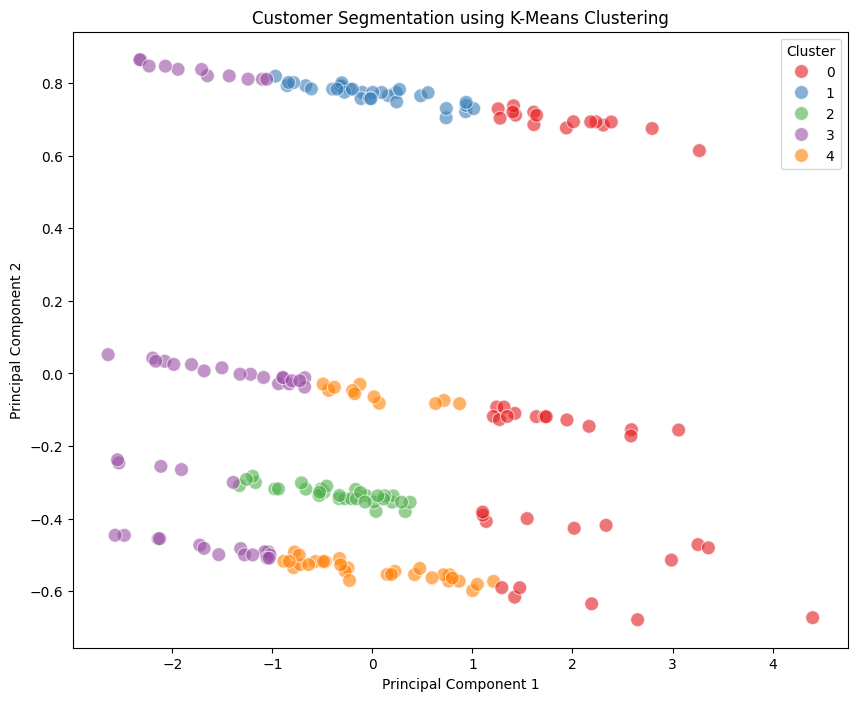

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the data
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Merge data to combine customer profile and transaction information
merged_data = pd.merge(transactions_df, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')

# Feature Engineering
# Aggregate transaction data per customer
customer_profile = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Sum of transaction values for each customer
    "Quantity": "sum",    # Total quantity purchased for each customer
}).reset_index()

# Add region as categorical feature (encode regions)
customer_profile = pd.merge(customer_profile, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

# Scaling the numerical features
scaler = StandardScaler()
customer_profile[['TotalValue', 'Quantity']] = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity']])

# Prepare the feature matrix (including region dummies)
features = customer_profile.drop(columns='CustomerID')

# Clustering: Using K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Set the number of clusters (adjust as needed)
customer_profile['Cluster'] = kmeans.fit_predict(features)

# Calculate DB Index
db_index = davies_bouldin_score(features, customer_profile['Cluster'])
print(f"DB Index: {db_index}")

# Visualize the clusters using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
customer_profile['PCA1'] = principal_components[:, 0]
customer_profile['PCA2'] = principal_components[:, 1]

# Plotting the clusters in a 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_profile, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.6)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()